[Dataset Source](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

# Importing required packages:

1. sklearn
2. matplotlib
3. keras
4. pandas
5. numpy
6. IPython.display




In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Markdown, display

e:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Reading dataset and analyzing linear-relationship using correlation matrix

1. First,we read the training and test datasets,and drop the 'date' feature,because intuitively it isn't going to give us any useful insight into the relationship between features and label.

2. We use the Karl-Pearson's Correlation(given by $ \rho=\frac{\text{cov}(X,Y)}{{\sigma_x}{\sigma_y}} \text{where } (0\leq \rho \leq 1)$) to calculate linear relationship between features and labels.Based on this matrix we can drop features which are least related,we can also drop features which are similar in kind or highly co-related and make our feature-set free from unwanted data.



In [63]:
train=pd.read_csv('datatraining.txt').drop(['date'],axis=1)
test1=pd.read_csv('datatest.txt').drop(['date'],axis=1)
test2=pd.read_csv('datatest2.txt').drop(['date'],axis=1)
train.corr(method='pearson').style.background_gradient()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1,-0.141759,0.649942,0.559894,0.151762,0.53822
Humidity,-0.141759,1,0.0378279,0.439023,0.955198,0.132964
Light,0.649942,0.0378279,1,0.664022,0.23042,0.907352
CO2,0.559894,0.439023,0.664022,1,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.23042,0.626556,1,0.300282
Occupancy,0.53822,0.132964,0.907352,0.712235,0.300282,1


# Data preprocessing 

1. We drop the 'Humidity' column as 'Humidity Ratio' gives the same information,and thus they are highly correlated.We can also see 'Humidity_Ratio' is slightly co-related with occupancy whereas 'Humidity' isn't,so that re-enforces our decision to drop that column.
<br>
2. We partion the training,test1 & test2 datasets into its feature set and label set,as we'll be using the feature set to predict corresponding labels.
<br>
3. Standardizing the feature set is also important, because by doing so we can bring everything down to the same scale and thus making comparison easier.Here we are converting feature distribution into Gaussian-Normal Distribution by applying <br>
($Z_{i}$ =$\frac{X_{i}- \mu}{\sigma}\text{where }(Z_{i}\text{is the transformed } X_{i},X_{i}\text{is the }i^{th} feature \in \text{Feature_set})$)

In [64]:

sc=StandardScaler()

#Partitioning into features and labels 

#train_set
train=train.drop(['Humidity'],axis=1)
x_train=train.iloc[:,0:-1]
x_train=sc.fit_transform(x_train)

x_train_visualize=x_train[:,[0,2]]
train_label=train.iloc[:,-1]

#test set1
test1=test1.drop(['Humidity'],axis=1)
x_test1=test1.iloc[:,0:-1]
x_test1=sc.transform(x_test1)
x_test1_visualize=x_test1[:,[0,2]]
test1_label=test1.iloc[:,-1]

#test set2
test2=test2.drop(['Humidity'],axis=1)
x_test2=test2.iloc[:,0:-1]
x_test2=sc.transform(x_test2)
x_test2_visualize=x_test2[:,[0,2]]
test2_label=test2.iloc[:,-1]



# Training Phase using:

1. Linear SVM classifier
2. GaussianNaiveBayes
3. Deep Neural Nets:of 4 layers(3 hidden and 1 output):
    


In [68]:
#training
models={'SVM':None,'GNB':None,'DNN':None}

#Using SVM classifier
clf=svm.SVC(kernel='linear',gamma='auto',C=1)
clf.fit(x_train,train_label)
models['SVM']=clf

#Using Gaussian Naive-Bayes
gnb = GaussianNB()
gnb.fit(x_train, train_label)
models['GNB']=gnb

#Using Deep Neural Nets a.k.a Multilayer-Perceptron
classifier=Sequential()

op=Adam(lr=0.001)
classifier.add(Dense(units=4,kernel_initializer='random_uniform',activation='relu',input_dim=4))

classifier.add(Dense(units=3,kernel_initializer='random_uniform',activation='relu'))

classifier.add(Dense(units=2,kernel_initializer='random_uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='random_uniform',activation='sigmoid'))

classifier.compile(optimizer=op,loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(x_train,train_label,batch_size=20,epochs=50)
models['DNN']=classifier



Epoch 1/50
8143/8143 [==============================] - 2s 193us/step - loss: 0.4980 - acc: 0.7877
Epoch 2/50
8143/8143 [==============================] - 1s 64us/step - loss: 0.2156 - acc: 0.8203
Epoch 3/50
8143/8143 [==============================] - 1s 62us/step - loss: 0.1487 - acc: 0.9801
Epoch 4/50
8143/8143 [==============================] - 1s 62us/step - loss: 0.1180 - acc: 0.9882
Epoch 5/50
8143/8143 [==============================] - 1s 62us/step - loss: 0.0995 - acc: 0.9882
Epoch 6/50
8143/8143 [==============================] - 0s 61us/step - loss: 0.0855 - acc: 0.9883
Epoch 7/50
8143/8143 [==============================] - 0s 61us/step - loss: 0.0748 - acc: 0.9883
Epoch 8/50
8143/8143 [==============================] - 0s 61us/step - loss: 0.0668 - acc: 0.9883
Epoch 9/50
8143/8143 [==============================] - 1s 61us/step - loss: 0.0609 - acc: 0.9883
Epoch 10/50
8143/8143 [==============================] - 0s 60us/step - loss: 0.0564 - acc: 0.9882
Epoch 11/50
8143/8

# Testing Phase using: dataset1 & 2

1. Printing the confusion matrix and accuracy of all the models(SVM,Gaussian Naive-Bayes,Deep Neural Nets) for datatest1.
2. Printing the confusion matrix and accuracy of all the models(SVM,Gaussian Naive-Bayes,Deep Neural Nets) for datatest2.

In [69]:

display(Markdown('# Datatest_1'))
for i in models.keys():
    predictions=models[i].predict(x_test1)>0.5
    Accuracy=round(accuracy_score(predictions,test1_label)*100,2)
    display(Markdown('### '+i+' '+'(Accuracy='+str(Accuracy)+'%)'))
    display(Markdown('#### Confusion Matrix'))
    print(confusion_matrix(predictions,test1_label))

display(Markdown('# -----------------------------------------------------------------'))

display(Markdown('# Datatest_2'))
for i in models.keys():
    predictions=models[i].predict(x_test2)>0.5
    Accuracy=round(accuracy_score(predictions,test2_label)*100,2)
    display(Markdown('### '+i+' '+'(Accuracy='+str(Accuracy)+'%)'))
    display(Markdown('#### Confusion Matrix'))
    print(confusion_matrix(predictions,test2_label),"\n")

# Datatest_1

### SVM (Accuracy=97.86%)

#### Confusion Matrix

[[1639    3]
 [  54  969]]


### GNB (Accuracy=97.75%)

#### Confusion Matrix

[[1638    5]
 [  55  967]]


### DNN (Accuracy=97.82%)

#### Confusion Matrix

[[1637    2]
 [  56  970]]


# -----------------------------------------------------------------

# Datatest_2

### SVM (Accuracy=99.25%)

#### Confusion Matrix

[[7644   14]
 [  59 2035]] 



### GNB (Accuracy=98.7%)

#### Confusion Matrix

[[7590   14]
 [ 113 2035]] 



### DNN (Accuracy=98.01%)

#### Confusion Matrix

[[7520   11]
 [ 183 2038]] 



# Visualization of decision boundary using 2 variables

1. Everything beneath this point is involved in plotting decision boundary on training set seperating 2 classes,to give a visual feel of how classification works.

2. We've taken 2 input features which gives the best decision boundary and represented it in graph format


In [52]:


def make_meshgrid(x, y, h=.02):
  
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    


In [65]:
#training
models1={'SVM':None,'GNB':None,'DNN':None}

#Using SVM classifier
clf=svm.SVC(kernel='linear', C=1,gamma='auto')
clf.fit(x_train_visualize,train_label)
models1['SVM']=clf

#Using Gaussian Naive-Bayes

gnb = GaussianNB()
gnb.fit(x_train_visualize, train_label)
models1['GNB']=gnb

#Using Deep Neural Nets a.k.a Multilayer-Perceptron
classifier1=Sequential()

op=Adam(lr=0.005)
classifier1.add(Dense(units=4,kernel_initializer='random_uniform',activation='relu',input_dim=2))

classifier1.add(Dense(units=3,kernel_initializer='random_uniform',activation='relu'))


classifier1.add(Dense(units=2,kernel_initializer='random_uniform',activation='relu'))

classifier1.add(Dense(units=1,kernel_initializer='random_uniform',activation='sigmoid'))

classifier1.compile(optimizer=op,loss='binary_crossentropy',metrics=['accuracy'])

classifier1.fit(x_train_visualize,train_label,batch_size=20,epochs=50)
models1['DNN']=classifier1

Epoch 1/50
8143/8143 [==============================] - 2s 186us/step - loss: 0.3269 - acc: 0.8442
Epoch 2/50
8143/8143 [==============================] - 0s 61us/step - loss: 0.2067 - acc: 0.9197
Epoch 3/50
8143/8143 [==============================] - 0s 61us/step - loss: 0.1972 - acc: 0.9203
Epoch 4/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1942 - acc: 0.9192
Epoch 5/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1930 - acc: 0.9189
Epoch 6/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1932 - acc: 0.9185
Epoch 7/50
8143/8143 [==============================] - 0s 60us/step - loss: 0.1925 - acc: 0.9183
Epoch 8/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1925 - acc: 0.9187
Epoch 9/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1928 - acc: 0.9191
Epoch 10/50
8143/8143 [==============================] - 0s 59us/step - loss: 0.1926 - acc: 0.9186
Epoch 11/50
8143/8

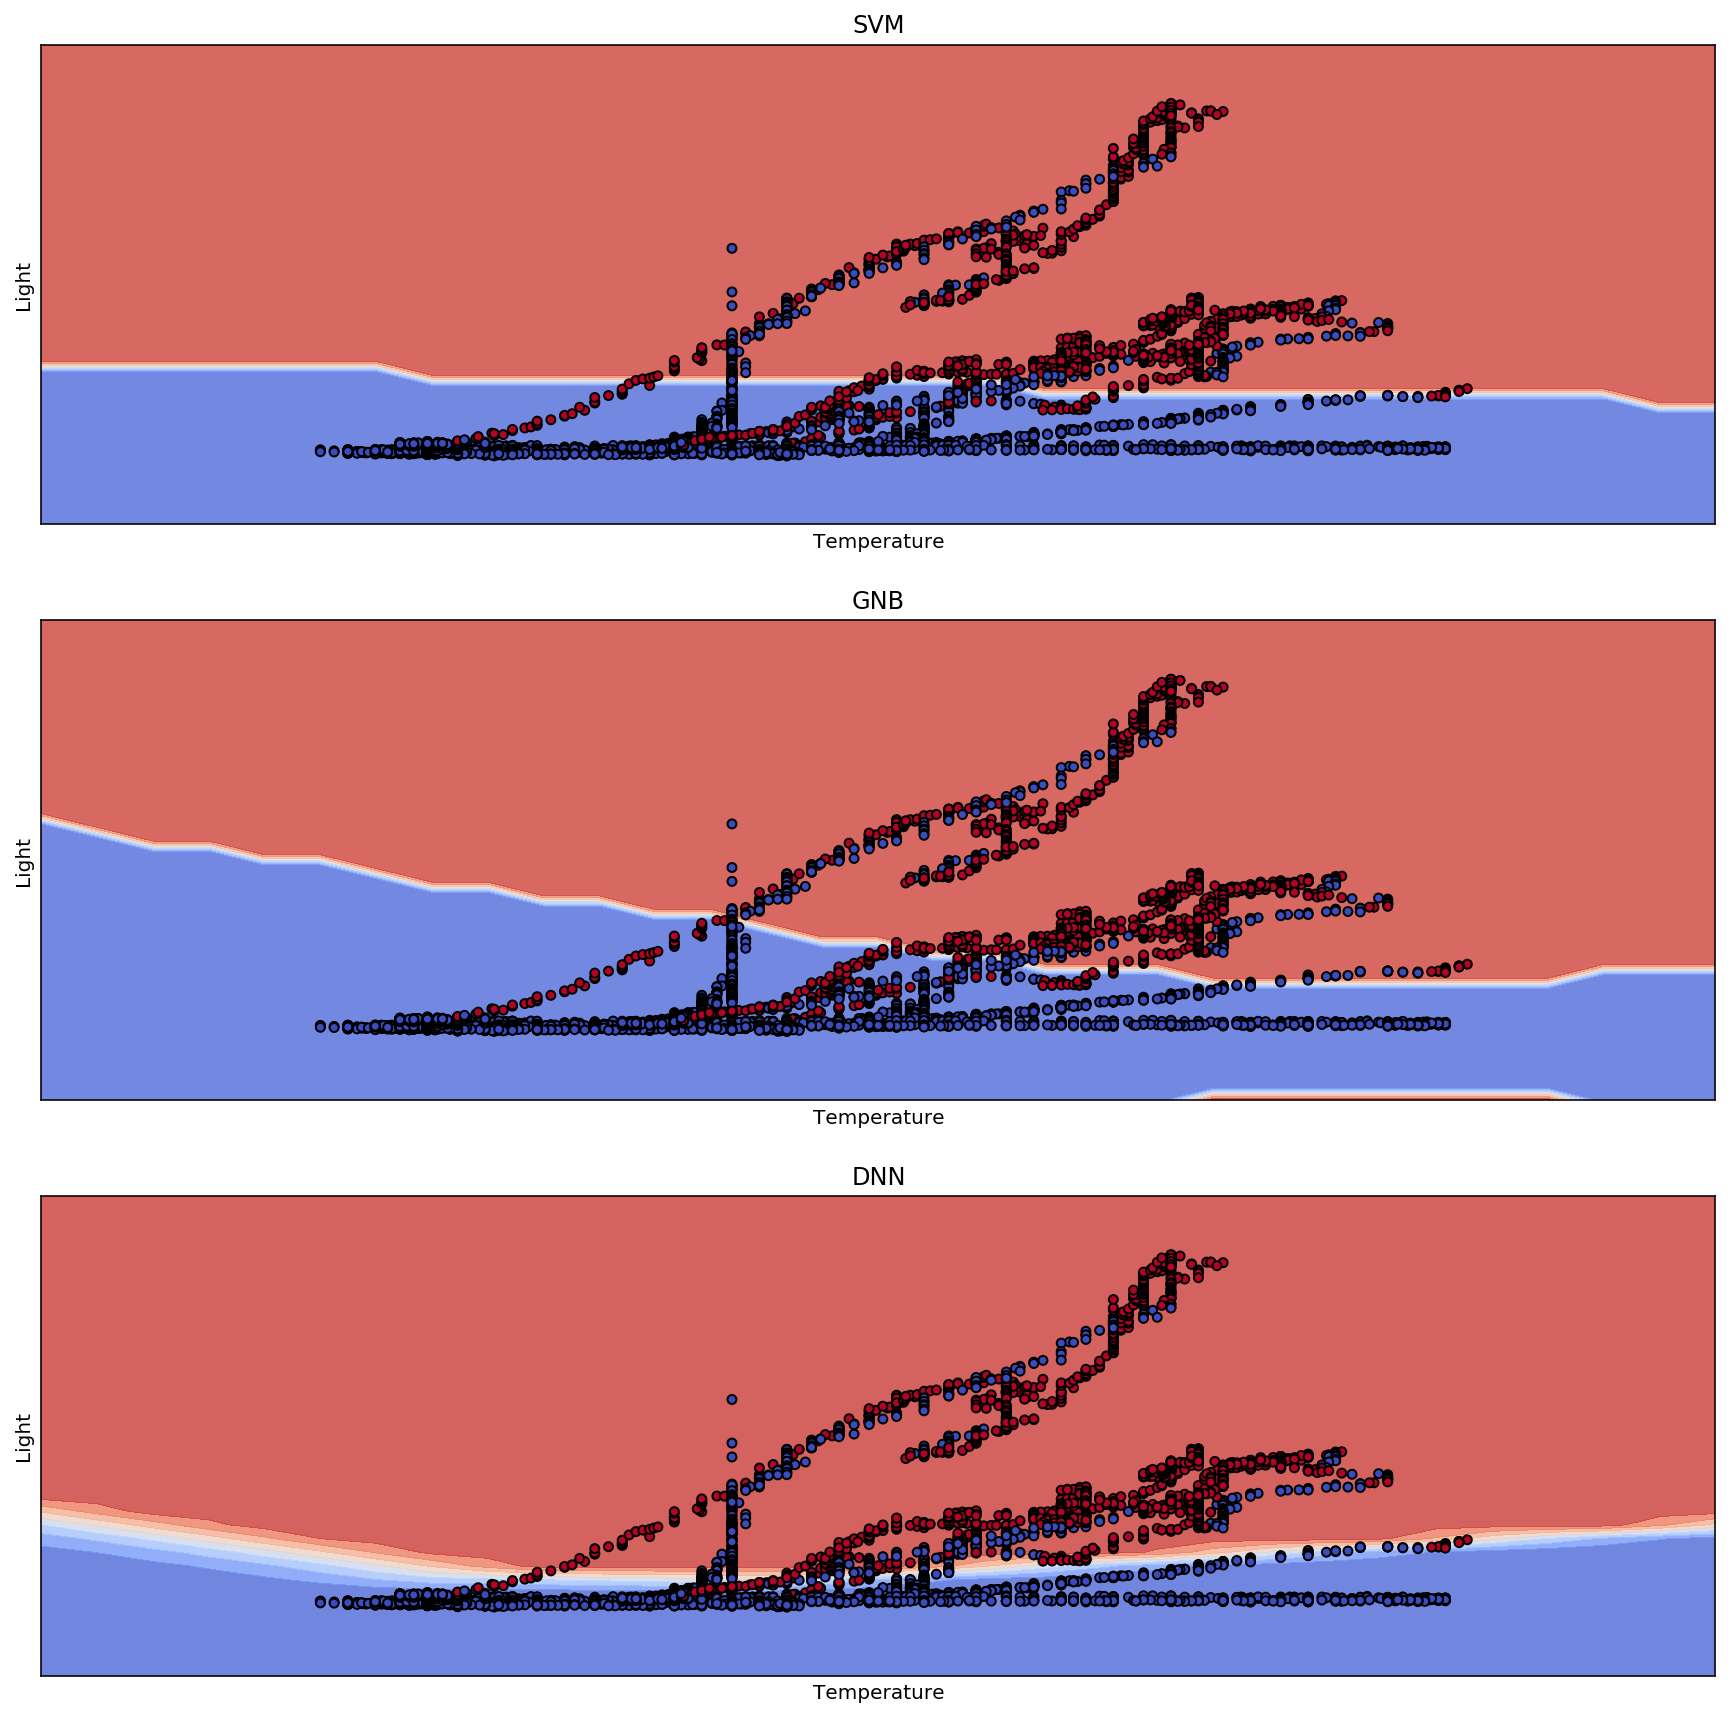

In [66]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(3,1,figsize=(15,15))
# plt.subplots_adjust(wspace=1.4, hspace=1.4)
x0,x1=x_train_visualize[:,0],x_train_visualize[:,1]
xx,yy=make_meshgrid(x0,x1,0.2)

for clf,ax in zip(models1,sub.flatten()):
    
    plot_contours(ax,models1[clf],xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(x0, x1, c=train_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Light')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(clf)